In [2]:
import pickle
import pandas as pd

## Load pickle files

In [3]:
!ls "Z:\Student Folders\Hisham_Temmar\tcFNNPaper\Results\variance_online"
dates = ["2022-02-02", "2023-01-31", "2023-02-07", "2023-02-14"]
run_names = [
    ["Run-004", "Run-005", "Run-006", "Run-007", "Run-009","Run-010"],
    ["Run-008", "Run-009", "Run-010", "Run-011", "Run-012","Run-013"],
    ["Run-004", "Run-005", "Run-006", "Run-007", "Run-008","Run-010"],
    ["Run-012", "Run-013", "Run-014", "Run-015", "Run-016","Run-017"]
]
days = [pickle.load(open(f"Z:/Student Folders/Hisham_Temmar/tcFNNPaper/Results/variance_online/onlinevariancemetrics_{dates[i]}.pkl", "rb")) for i in range(4)]

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
days[0]

,TrialTime,AcquireTime,OrbitTime,PathEff,BitRate,Run,Decoder,TrialSuccess
0,3496,446.0,2300.0,0.645192,0.457532,Run-004,1,True
1,1348,598.0,0.0,0.044221,0.244109,Run-004,1,True
2,5398,3048.0,1600.0,0.488512,0.737026,Run-004,1,True
3,4198,1248.0,2200.0,0.871492,1.398382,Run-004,1,True
4,1998,398.0,1100.0,0.799707,0.716090,Run-004,1,True
...,...,...,...,...,...,...,...,...
600,2498,1448.0,550.0,0.283606,1.391194,Run-010,1,True
601,2248,1748.0,0.0,0.522896,1.869802,Run-010,1,True
602,2448,1298.0,650.0,0.656078,2.370146,Run-010,1,True
603,1198,698.0,0.0,0.420247,1.454840,Run-010,1,True


In [5]:
# Remove unsuccessful trials
for i in range(len(days)):
    days[i] = days[i][days[i]["TrialSuccess"] == True]

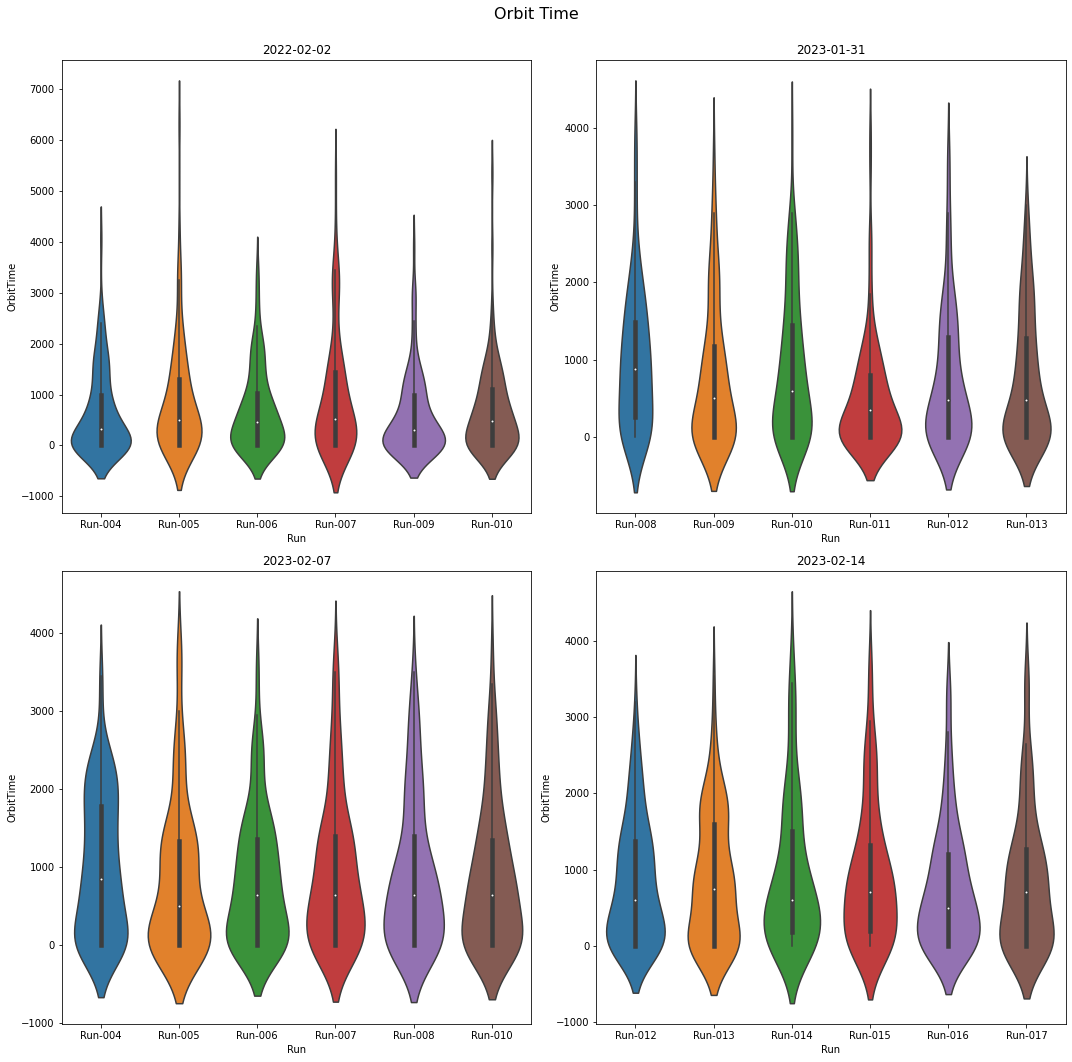

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(2, 2, figsize=(15, 15))  # Adjust size as necessary

# Create violin plots
sns.violinplot(x=days[0].Run, y=days[0].OrbitTime, ax=axs[0, 0])
sns.violinplot(x=days[1].Run, y=days[1].OrbitTime, ax=axs[0, 1])
sns.violinplot(x=days[2].Run, y=days[2].OrbitTime, ax=axs[1, 0])
sns.violinplot(x=days[3].Run, y=days[3].OrbitTime, ax=axs[1, 1])

# Set titles
axs[0, 0].set_title(f'{dates[0]}')
axs[0, 1].set_title(f'{dates[1]}')
axs[1, 0].set_title(f'{dates[2]}')
axs[1, 1].set_title(f'{dates[3]}')

# Set x and y labels
for ax in axs.flat:
    ax.set(xlabel='Run', ylabel='OrbitTime')

plt.tight_layout()
fig.suptitle('Orbit Time', fontsize=16)
fig.tight_layout(rect=[0, 0, 1, 0.98])  # Adjust the values as necessary
plt.show()


## Convert to CSV to run analyses in R

In [7]:
import pandas as pd

# Combine the two dataframes into one, adding a column to differentiate between the two days
days[0]['Day'] = 'Day1'
days[1]['Day'] = 'Day2'
days[2]['Day'] = 'Day3'
days[3]['Day'] = 'Day4'
# Set the algorithm names
for i in range(4):
    days[i]['Algorithm'] = ""
days[0]['Algorithm'][days[0].Run == run_names[0][0]] = "alg00"
days[0]['Algorithm'][days[0].Run == run_names[0][1]] = "alg01"
days[0]['Algorithm'][days[0].Run == run_names[0][2]] = "alg02"
days[0]['Algorithm'][days[0].Run == run_names[0][3]] = "alg03"
days[0]['Algorithm'][days[0].Run == run_names[0][4]] = "alg04"
days[0]['Algorithm'][days[0].Run == run_names[0][5]] = "alg00"
days[1]['Algorithm'][days[1].Run == run_names[1][0]] = "alg10"
days[1]['Algorithm'][days[1].Run == run_names[1][1]] = "alg11"
days[1]['Algorithm'][days[1].Run == run_names[1][2]] = "alg12"
days[1]['Algorithm'][days[1].Run == run_names[1][3]] = "alg13"
days[1]['Algorithm'][days[1].Run == run_names[1][4]] = "alg14"
days[1]['Algorithm'][days[1].Run == run_names[1][5]] = "alg10"
days[2]['Algorithm'][days[2].Run == run_names[2][0]] = "alg20"
days[2]['Algorithm'][days[2].Run == run_names[2][1]] = "alg20"
days[2]['Algorithm'][days[2].Run == run_names[2][2]] = "alg20"
days[2]['Algorithm'][days[2].Run == run_names[2][3]] = "alg20"
days[2]['Algorithm'][days[2].Run == run_names[2][4]] = "alg20"
days[2]['Algorithm'][days[2].Run == run_names[2][5]] = "alg20"
days[3]['Algorithm'][days[3].Run == run_names[3][0]] = "alg30"
days[3]['Algorithm'][days[3].Run == run_names[3][1]] = "alg30"
days[3]['Algorithm'][days[3].Run == run_names[3][2]] = "alg30"
days[3]['Algorithm'][days[3].Run == run_names[3][3]] = "alg30"
days[3]['Algorithm'][days[3].Run == run_names[3][4]] = "alg30"
days[3]['Algorithm'][days[3].Run == run_names[3][5]] = "alg30"


combined_df = pd.concat([days[0], days[1], days[2], days[3]])
combined_df["Day"] = combined_df['Day'].astype('category')
combined_df["Algorithm"] = combined_df['Algorithm'].astype('category')
combined_df.to_csv("Z:/Student Folders/Hisham_Temmar/tcFNNPaper/Results/variance_online/combined_df_only_successfultrials.csv")

C:\Users\Luis\AppData\Local\Temp\ipykernel_28016\1503313723.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  days[0]['Day'] = 'Day1'
C:\Users\Luis\AppData\Local\Temp\ipykernel_28016\1503313723.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  days[i]['Algorithm'] = ""
C:\Users\Luis\AppData\Local\Temp\ipykernel_28016\1503313723.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [8]:
combined_df

,TrialTime,AcquireTime,OrbitTime,PathEff,BitRate,Run,Decoder,TrialSuccess,Day,Algorithm
0,3496,446.0,2300.0,0.645192,0.457532,Run-004,1,True,Day1,alg00
1,1348,598.0,0.0,0.044221,0.244109,Run-004,1,True,Day1,alg00
2,5398,3048.0,1600.0,0.488512,0.737026,Run-004,1,True,Day1,alg00
3,4198,1248.0,2200.0,0.871492,1.398382,Run-004,1,True,Day1,alg00
4,1998,398.0,1100.0,0.799707,0.716090,Run-004,1,True,Day1,alg00
...,...,...,...,...,...,...,...,...,...,...
711,1948,1348.0,100.0,0.751466,2.815576,Run-017,1,True,Day4,alg30
712,2148,848.0,800.0,0.463558,1.282026,Run-017,1,True,Day4,alg30
713,1448,948.0,0.0,0.225848,0.994038,Run-017,1,True,Day4,alg30
714,1048,548.0,0.0,0.781936,5.763299,Run-017,1,True,Day4,alg30
